Title: Analysis on the relation between tennis players’ age, rank, and match duration

Introduction:

The ATP Tour is a worldwide tennis competition organized for men. The tournament spans over a calendar year and across more than 30 countries. Qualification for these games is determined through tennis rankings, which are points earned by players in official ATP-certified events, with the best 19 results counted.

Tennis matches on average last 165 minutes, serving as a test of a player’s resilience and strategy, which stem from a combination of talent and experience. These factors underpin our research question: Can the age range of a winning player be predicted based on their rank and the duration of the match in minutes? In this study, the atp2017-2019 database, which contains data on all the players and match points from 2017 to 2019, is used, and the analysis will only be performed on players at the Grand Slam tourney level and best-of-5 match for an equal comparison. 

Preliminary exploratory data analysis:

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 10)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [2]:
url <- "https://raw.githubusercontent.com/Windy-Huang/DSCI-100-009-22/main/atp2017-2019.csv"
tennis_data <- read_csv(url)
tennis_data

New names:
• `` -> `...1`
Rows: 6866 Columns: 50
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): tourney_id, tourney_name, surface, tourney_level, winner_seed, win...
dbl (34): ...1, draw_size, tourney_date, match_num, winner_id, winner_ht, wi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,⋯,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2,⋯,54,34,20,14,10,15,9,3590,16,1977
1,2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4,⋯,52,36,7,10,10,13,16,1977,239,200
2,2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2,⋯,27,15,6,8,1,5,9,3590,40,1050
3,2019-M020,Brisbane,Hard,32,A,20181231,297,104542,NA,⋯,60,38,9,11,4,6,239,200,31,1298
4,2019-M020,Brisbane,Hard,32,A,20181231,296,106421,4,⋯,56,46,19,15,2,4,16,1977,18,1855
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2881,2017-0605,Tour Finals,Hard,8,F,20171113,300,105777,6.0,⋯,54,42,22,15,11,15,6,3650,8,2975
2882,2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,1,105676,NA,⋯,53,33,21,14,6,11,7,3775,18,2235
2883,2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,2,104542,NA,⋯,54,30,12,12,5,11,15,2320,76,667


In [3]:
tennis_selected <- tennis_data |>
    select(tourney_level, winner_name, winner_age, winner_rank, minutes, best_of, w_svpt, winner_ht)
tennis_selected

tourney_level,winner_name,winner_age,winner_rank,minutes,best_of,w_svpt,winner_ht
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,Kei Nishikori,29.00479,9,124,3,77,178
A,Daniil Medvedev,22.88569,16,82,3,52,NA
A,Kei Nishikori,29.00479,9,66,3,47,178
A,Jo Wilfried Tsonga,33.70568,239,106,3,68,188
A,Daniil Medvedev,22.88569,16,129,3,105,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
F,Grigor Dimitrov,26.49692,6,150,3,103,188
D,David Goffin,26.95414,7,119,3,74,163
D,Jo Wilfried Tsonga,32.59411,15,106,5,64,188


In [4]:
tennis_filtered_tourney_level <- tennis_selected |>
    filter(tourney_level == "G")
tennis_filtered_tourney_level 


tourney_level,winner_name,winner_age,winner_rank,minutes,best_of,w_svpt,winner_ht
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
G,Novak Djokovic,31.64956,1,123,5,65,188
G,Jo Wilfried Tsonga,33.74401,177,146,5,89,188
G,Taro Daniel,25.96304,82,92,5,61,NA
G,Denis Shapovalov,19.75086,27,115,5,89,NA
G,David Goffin,28.10404,22,88,5,62,163
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
G,Kevin Anderson,31.27995,32,206,5,147,203
G,Pablo Carreno Busta,26.13005,19,119,5,97,188
G,Rafael Nadal,31.23614,1,150,5,90,185


In [5]:
tennis_factored <- tennis_filtered_tourney_level |>
    mutate(age = ifelse(winner_age <= 30, "Under 30", "Over 30")) |>
    mutate(age = factor(age, levels=c("Under 30", "Over 30")))
tennis_factored
print("In the table, only 2 rows have missing data;")
print("hence, its impact is negligible in the database of more than 1200 rows of data.")

tourney_level,winner_name,winner_age,winner_rank,minutes,best_of,w_svpt,winner_ht,age
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
G,Novak Djokovic,31.64956,1,123,5,65,188,Over 30
G,Jo Wilfried Tsonga,33.74401,177,146,5,89,188,Over 30
G,Taro Daniel,25.96304,82,92,5,61,NA,Under 30
G,Denis Shapovalov,19.75086,27,115,5,89,NA,Under 30
G,David Goffin,28.10404,22,88,5,62,163,Under 30
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
G,Kevin Anderson,31.27995,32,206,5,147,203,Over 30
G,Pablo Carreno Busta,26.13005,19,119,5,97,188,Under 30
G,Rafael Nadal,31.23614,1,150,5,90,185,Over 30


[1] "In the table, only 2 rows have missing data;"
[1] "hence, its impact is negligible in the database of more than 1200 rows of data."


In [6]:
set.seed(99)
tennis_split <- initial_split(tennis_factored, prop=0.75, strata=age)
tennis_training <- training(tennis_split)
tennis_testing <- testing(tennis_split)

rank <- tennis_training |>
    group_by(age) |>
    summarize(mean_rank=mean(winner_rank))
time <- tennis_training |>
    group_by(age) |>
    summarize(mean_match_time=mean(minutes))
stats <- tennis_training |>
    group_by(age) |>
    summarize(count=n()) |>
    inner_join(rank) |>
    inner_join(time)
stats
print("The table provided illustrates the number of observations within each age range,")
print("along with their respective mean rank and average match time.")

Joining with `by = join_by(age)`
Joining with `by = join_by(age)`


age,count,mean_rank,mean_match_time
<fct>,<int>,<dbl>,<dbl>
Under 30,581,49.58520,153.1515
Over 30,366,36.91257,145.5355


[1] "The table provided illustrates the number of observations within each age range,"
[1] "along with their respective mean rank and average match time."


$title
[1] "Winner age VS Winner rank (an evidence for our choice)"

attr(,"class")
[1] "labels"

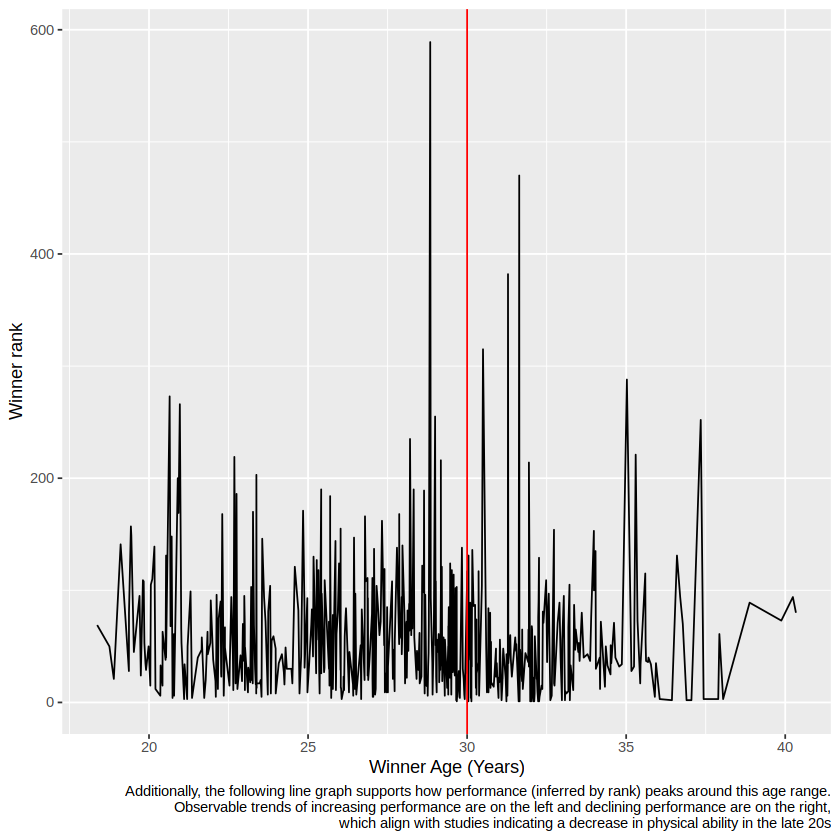

In [7]:
match_plot <- tennis_training |>
    ggplot(aes(x=winner_age, y=winner_rank)) +
    geom_line() +
    geom_vline(xintercept=30, color="red") +
    labs(x="Winner Age (Years)",
         y="Winner rank",
         caption="Additionally, the following line graph supports how performance (inferred by rank) peaks around this age range.
                  Observable trends of increasing performance are on the left and declining performance are on the right,
                  which align with studies indicating a decrease in physical ability in the late 20s")
    ggtitle("Winner age VS Winner rank (an evidence for our choice)")
match_plot

The categorical variable this model aims to classify is the age of the winner. Our group carefully selected 30 as the turning point for dividing the age categories, as this age aligns with the center of our data. 

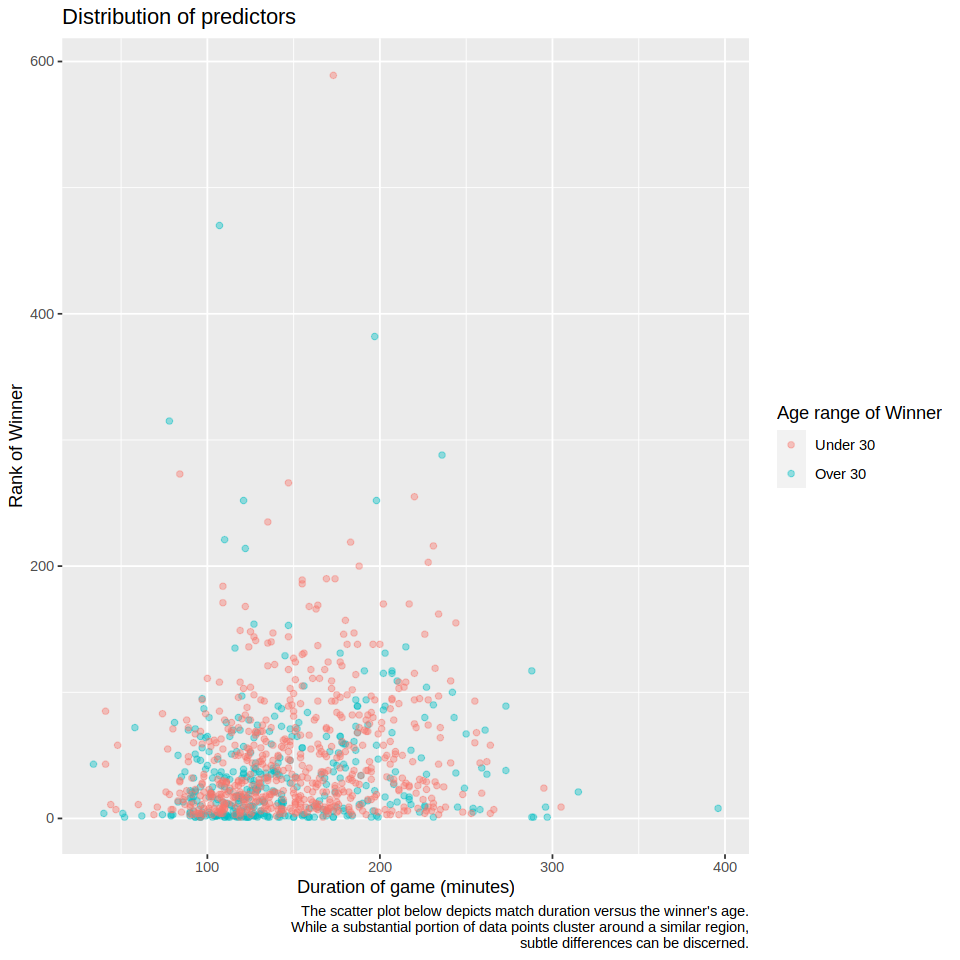

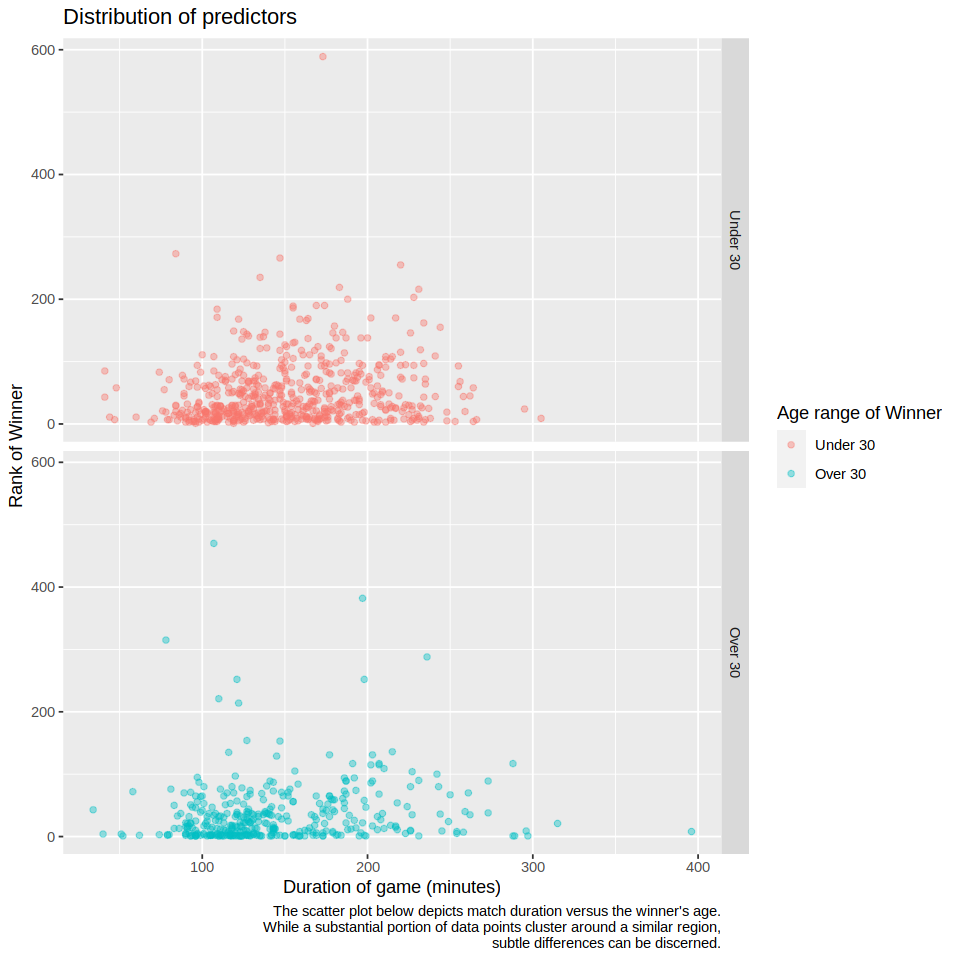

In [8]:
options(repr.plot.width = 8, repr.plot.height = 8)

tennis_plot <- tennis_training |>
    ggplot(aes(x=minutes, y=winner_rank, color=age)) +
    geom_point(alpha=0.4) +
    labs(x="Duration of game (minutes)",
         y="Rank of Winner",
         color="Age range of Winner",
         caption="The scatter plot below depicts match duration versus the winner's age.
                  While a substantial portion of data points cluster around a similar region,
                  subtle differences can be discerned.") +
    ggtitle("Distribution of predictors")
tennis_plot

tennis_facet <- tennis_plot +
    facet_grid(rows=vars(age))
tennis_facet

Notably, younger winners tend to have higher ranks and longer match times, while older winners typically exhibit lower ranks and shorter match durations. This aligns with the data in our previous analysis, demonstrating how performance starts to decline for individuals over the age of 30.

Methods:

We will conduct our data analysis by focusing on how the duration of games and rank of the winner can be used to determine what age range they fall under. To do this we will use the following variables: tournament level (Grand Slam), name of the winning player, the age of the winner, the rank of the winner, the game duration in minutes, and best of how many sets (5 for grand slam level). 

One of our visualizations will be a scatter plot; we will display the game duration in minutes on the x axis and winner rank on the y axis. The points will be coloured to show the age range of the winners, distinguishing between those over or under 30. Based on this, we will use classification to help predict the age range of the winners of games.


Expected outcomes and significance:

We expect to find that players younger than 30 will, on average, be ranked higher than the older players and that their matches last longer.

Using the player's age as a reference point people could make more informed predictions about where a player will be ranked in the future as they continue to age. Tournament organizers could also look at the ages of the players attending their event and plan a more efficient schedule accounting for longer matches if a majority of the players fall below the age of 30.

A future question this could lead to is: why do players older than 30 average shorter game durations than the younger players? 
